# Dataset
---
- Young Adult's Affective Data - ECG and GSR Signals
  - This dataset shows about the correlative ECG(heart rate) with basic emoitions like surprise, anger, fear, happiness, sadness and disgust.
  - We plan to use this data as a training model preset by combining data with another dataset, so there will be more heart rate's data.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
import seaborn as sns

In [8]:
Analog_1 = pd.read_csv('datasets/ECG_GSR_Emotions/Raw_Data/Single_Modal/ECG/ECGdata_s1p10v1.dat',
                     lineterminator=',',
                     header=None,
                     names=['Time'])
Analog_1

FileNotFoundError: [Errno 2] No such file or directory: 'datasets/ECG_GSR_Emotions/Raw_Data/Single_Modal/ECG/ECGdata_s1p10v1.dat'

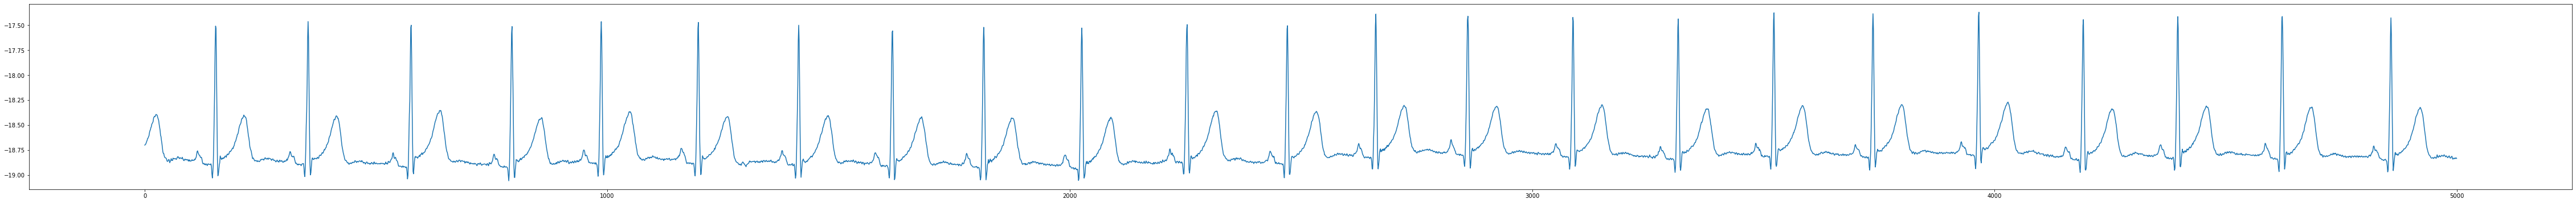

In [ ]:
pt.figure(figsize=(80,6))
pt.plot(Analog_1.index.values,Analog_1['Time'])
pt.show()

In [ ]:
Differenced = Analog_1.diff(1)
xMean = np.abs(Differenced).mean()
spikes = Differenced > abs(xMean)+0.3
spiked = spikes[spikes['Time'] == True]
spiked.count()

Time    32
dtype: int64

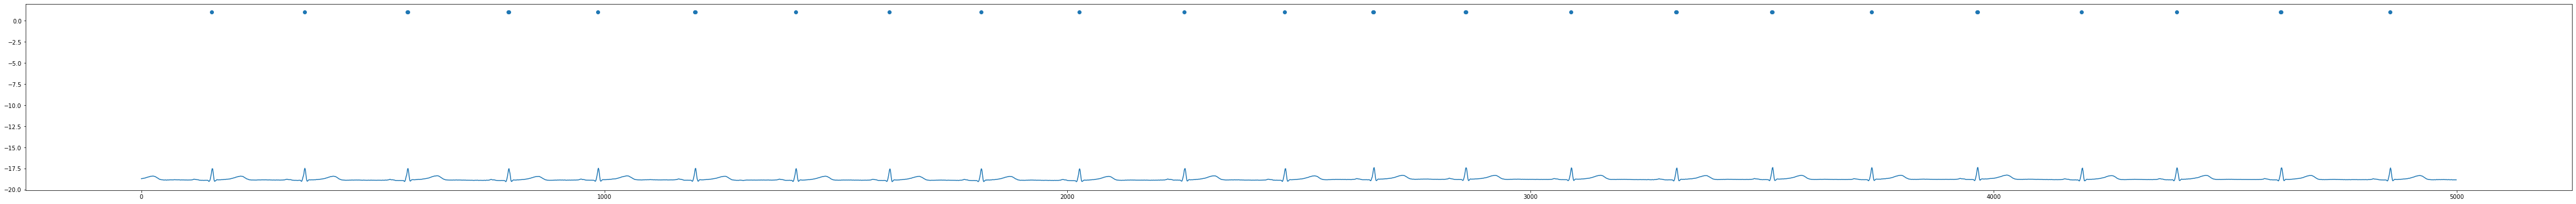

In [ ]:
pt.figure(figsize=(80,6))
pt.scatter(spiked.index.values,spiked['Time'])
pt.plot(Analog_1.index.values,Analog_1['Time'])
pt.show()

In [ ]:
range_array = np.empty([spiked['Time'].count()-1])
count = spiked['Time'].count()-1

for i in range(count):
  range_array[i] = spiked['Time'].index[i+1]-spiked['Time'].index[i]

#Get Range Mean
rMean = range_array.mean()

#Get Range Standard Deviation
rSD = range_array.std()


print("Heart frequency " +str(rMean) + "±" +str(rSD))

Heart frequency 151.74193548387098±96.99283902464325


- Heart rate prediction
  - This dataset shows the heart rate that already analyze as VLF(very low frequency), LF(low frequency) and HF(high frequency). We can use these features to calculate valence and arousal.
  - we are going to use this dataset to combine with the previous one so we can have more data to train the model

In [ ]:
heartRate = pd.read_csv('datasets/heart_rate_prediction/frequency_domain_features_train.csv')
heartRate

,uuid,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF
0,89df2855-56eb-4706-a23b-b39363dd605a,2661.894136,72.203287,1009.249419,27.375666,98.485263,15.522603,0.421047,1.514737,3686.666157,65.018055,0.015380
1,80c795e4-aa56-4cc0-939c-19634b89cbb2,2314.265450,76.975728,690.113275,22.954139,99.695397,2.108525,0.070133,0.304603,3006.487251,327.296635,0.003055
2,c2d5d102-967c-487d-88f2-8b005a449f3e,1373.887112,51.152225,1298.222619,48.335104,98.950472,13.769729,0.512671,1.049528,2685.879461,94.280910,0.010607
3,37eabc44-1349-4040-8896-0d113ad4811f,2410.357408,70.180308,1005.981659,29.290305,98.224706,18.181913,0.529387,1.775294,3434.520980,55.328701,0.018074
4,aa777a6a-7aa3-4f6e-aced-70f8691dd2b7,1151.177330,43.918366,1421.782051,54.242160,96.720007,48.215822,1.839473,3.279993,2621.175204,29.487873,0.033912
...,...,...,...,...,...,...,...,...,...,...,...,...
369284,028ae89f-0120-4808-955f-f6b3ecaa59b3,298.009244,45.893349,313.115284,48.219676,89.119683,38.227175,5.886975,10.880317,649.351702,8.190908,0.122087
369285,03f6d164-b28d-49e8-9e27-0288577408ec,1558.597883,68.405858,717.285030,31.481178,99.642453,2.573834,0.112964,0.357547,2278.456746,278.683532,0.003588
369286,fd717478-95c3-48fc-bcdc-3adebae824ab,1950.393956,45.030641,2376.578392,54.870376,99.819930,4.287216,0.098983,0.180070,4331.259564,554.340761,0.001804
369287,a0fc861e-3254-4210-bd5d-37870245f7da,1606.291482,54.821185,1277.128490,43.587168,96.477005,46.636158,1.591647,3.522995,2930.056129,27.384942,0.036516


In [ ]:
# Check missing data
heartRate.isnull().sum()

uuid       0
VLF        0
VLF_PCT    0
LF         0
LF_PCT     0
LF_NU      0
HF         0
HF_PCT     0
HF_NU      0
TP         0
LF_HF      0
HF_LF      0
dtype: int64

In [ ]:
heartRate_features = ["uuid" ,"VLF", "LF", "HF"]
heartRate[heartRate_features]

,uuid,VLF,LF,HF
0,89df2855-56eb-4706-a23b-b39363dd605a,2661.894136,1009.249419,15.522603
1,80c795e4-aa56-4cc0-939c-19634b89cbb2,2314.265450,690.113275,2.108525
2,c2d5d102-967c-487d-88f2-8b005a449f3e,1373.887112,1298.222619,13.769729
3,37eabc44-1349-4040-8896-0d113ad4811f,2410.357408,1005.981659,18.181913
4,aa777a6a-7aa3-4f6e-aced-70f8691dd2b7,1151.177330,1421.782051,48.215822
...,...,...,...,...
369284,028ae89f-0120-4808-955f-f6b3ecaa59b3,298.009244,313.115284,38.227175
369285,03f6d164-b28d-49e8-9e27-0288577408ec,1558.597883,717.285030,2.573834
369286,fd717478-95c3-48fc-bcdc-3adebae824ab,1950.393956,2376.578392,4.287216
369287,a0fc861e-3254-4210-bd5d-37870245f7da,1606.291482,1277.128490,46.636158
